In [1]:
# Writing first LSTM model
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
 
newRegeurusd_df = pd.read_csv('RegEurUsd.csv')
newRegeurusd_df.set_index("time")



# To isolate the last 5% of the dataset
times = sorted(newRegeurusd_df.index.values)
last_5pct = times[-int(0.05*len(times))]

# Split the Traing & Test data 
X_train = newRegeurusd_df[['bidPrice','offerPrice','bidQuantity','offerQuantity','vwapPrice','totalXnetQuantity',
                           'logratio','netQuantity']][0:25000]
y_train = np.diff(newRegeurusd_df['midPrice'][0:25001])

X_test = newRegeurusd_df[['bidPrice','offerPrice','bidQuantity','offerQuantity','vwapPrice','totalXnetQuantity',
                          'logratio','netQuantity']][25001:len(newRegeurusd_df)-1]
y_test = np.diff(newRegeurusd_df['midPrice'][25001:len(newRegeurusd_df)])

#Normalize the data
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# No. of samples needed to make next prediction
timesteps = 100

#X_train = scaler.transform(X_train).reshape(20000,8)
#X_test = scaler.transform(X_test).reshape(len(newRegeurusd_df)-20001,8)

#LSTMs require a 3 dimensional input. Your input shape should be in the form of (samples, timesteps, features). 
#Since keras infers the first dimension is samples, you should be inputting (timesteps, features) as your input shape.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train = y_train.reshape(X_train.shape[0],1)
y_test  = y_test.reshape(X_test.shape[0],1)

#Now build the LSTM model
model = Sequential()

#relu = Rectified Linear
model.add(LSTM(128,input_shape=(8,1),activation='relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))

#model.add(LSTM(32,input_shape=(8,1),activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

opt = tf.keras.optimizers.Adam(lr = 1e-3,decay = 1e-5)
#model.compile(loss='mean_squared_logarithmic_error',optimizer = opt,metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy',optimizer = opt,metrics=['accuracy'])

#X_train = np.reshape(X_train,1)
#X_test = np.reshape(X_test, (X_test.shape[0],  X_test.shape[1]))
#batch_size = 100

history = model.fit(X_train,y_train,epochs= 3,validation_data = (X_test, y_test))


Train on 25000 samples, validate on 4761 samples
Epoch 1/3
25000/25000 [==============================] - 10s 394us/sample - loss: 0.0472 - accuracy: 0.0742 - val_loss: 0.0000e+00 - val_accuracy: 0.0727
Epoch 2/3
25000/25000 [==============================] - 8s 319us/sample - loss: 0.0000e+00 - accuracy: 0.0743 - val_loss: 0.0000e+00 - val_accuracy: 0.0727
Epoch 3/3
25000/25000 [==============================] - 8s 320us/sample - loss: 0.0000e+00 - accuracy: 0.0743 - val_loss: 0.0000e+00 - val_accuracy: 0.0727


In [263]:
newRegeurusd_df = pd.read_csv('RegEurUsd.csv')
newRegeurusd_df.set_index("time")



# To isolate the last 5% of the dataset
times = sorted(newRegeurusd_df.index.values)
last_5pct = times[-int(0.05*len(times))]

# Split the Traing & Test data 
X_train = newRegeurusd_df[['bidPrice','offerPrice','bidQuantity','offerQuantity','vwapPrice','totalXnetQuantity',
                           'logratio','netQuantity']][0:25000]
y_train = np.diff(newRegeurusd_df['midPrice'][0:25001])

X_test = newRegeurusd_df[['bidPrice','offerPrice','bidQuantity','offerQuantity','vwapPrice','totalXnetQuantity',
                          'logratio','netQuantity']][25001:len(newRegeurusd_df)-1]
y_test = np.diff(newRegeurusd_df['midPrice'][25001:len(newRegeurusd_df)])

#Normalize the data
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape[0],X_train.shape[1])

25000 8


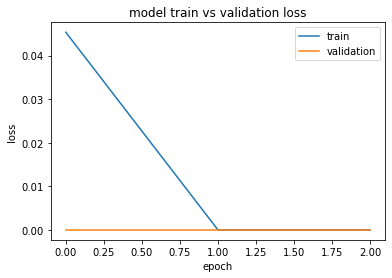

In [205]:
eurusd_prices[0:1].shape
mnist = tf.keras.datasets.mnist
#(x_train,y_train),(x_test,y_test) = mnist.load_data()
y_test
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [221]:
eurusd_prices[0:5]
#eurusd_prices.shape
newRegeurusd_df.head
times = sorted(newRegeurusd_df.index.values)
len(np.diff(y_train))

DAXFutures_df = pd.read_csv("C:/Users/Shuv/Documents/All Trading/Market Data/Futures_Data/Barchart2017-19/DAX_Futures_Daily.csv")
DAXFutures_df.head
DAXFutures_df.drop(DAXFutures_df.columns[[0, 1, 5]], axis=1, inplace= False)
DAXFutures_df.head
X_train = DAXFutures_df.drop(DAXFutures_df.columns[[0, 1,6]], axis=1,inplace = False)[0:500]
list(DAXFutures_df)


In [249]:
# DAX LSTM Daily timeframe modelling

DAXFutures_df = pd.read_csv("C:/Users/Shuv/Documents/All Trading/Market Data/Futures_Data/Barchart2017-19/DAX_Futures_Daily.csv")
DAXFutures_df.set_index("Date Time")

#Drop the EMA200 column as it would lose many rows, and also Implied Vol, and then remove all blanks
DAXFutures_df.drop(['MA-Exp-200','Implied Volatility'], axis = 1 , inplace = True )
DAXFutures_df.dropna(axis=0,how='any',inplace=True)
print(DAXFutures_df.shape)

X_train = DAXFutures_df.drop(DAXFutures_df.columns[[0, 1, 5, 6]], axis=1,inplace = False)[0:500]
y_train = np.diff(DAXFutures_df['Close'][0:501])

X_test = DAXFutures_df.drop(DAXFutures_df.columns[[0, 1, 5, 6]], axis=1,inplace = False)[501:len(DAXFutures_df)-1]
y_test = np.diff(DAXFutures_df['Close'][501:len(DAXFutures_df)])

#Normalize the data
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#X_train = scaler.transform(X_train).reshape(20000,8)
#X_test = scaler.transform(X_test).reshape(len(newRegeurusd_df)-20001,8)

#LSTMs require a 3 dimensional input. Your input shape should be in the form of (samples, timesteps, features). 
#Since keras infers the first dimension is samples, you should be inputting (timesteps, features) as your input shape.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train = y_train.reshape(X_train.shape[0],1)
y_test  = y_test.reshape(X_test.shape[0],1)

#Now build the LSTM model
model = Sequential()

#relu = Rectified Linear
model.add(LSTM(128,input_shape=(X_train.shape[1],1),activation='relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))

#model.add(LSTM(32,input_shape=(X_train.shape[1],1),activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

opt = tf.keras.optimizers.Adam(lr = 1e-3,decay = 1e-5)
#model.compile(loss='mean_squared_logarithmic_error',optimizer = opt,metrics=['accuracy'])
model.compile(loss='huber_loss',optimizer = opt,metrics=['accuracy'])

#X_train = np.reshape(X_train,1)
#X_test = np.reshape(X_test, (X_test.shape[0],  X_test.shape[1]))
#batch_size = 100

historyDAX = model.fit(X_train,y_train,epochs= 10,validation_data = (X_test, y_test))

(591, 16)
Train on 500 samples, validate on 89 samples
Epoch 1/10
500/500 [==============================] - 2s 3ms/sample - loss: 86.3534 - accuracy: 0.0040 - val_loss: 66.5102 - val_accuracy: 0.0000e+00
Epoch 2/10
500/500 [==============================] - 0s 491us/sample - loss: 86.3534 - accuracy: 0.0220 - val_loss: 66.5102 - val_accuracy: 0.0000e+00
Epoch 3/10
500/500 [==============================] - 0s 473us/sample - loss: 86.3534 - accuracy: 0.1140 - val_loss: 66.5102 - val_accuracy: 0.0899
Epoch 4/10
500/500 [==============================] - 0s 479us/sample - loss: 86.3534 - accuracy: 0.1800 - val_loss: 66.5102 - val_accuracy: 0.2360
Epoch 5/10
500/500 [==============================] - 0s 483us/sample - loss: 86.3534 - accuracy: 0.2360 - val_loss: 66.5102 - val_accuracy: 0.2135
Epoch 6/10
500/500 [==============================] - 0s 473us/sample - loss: 86.3534 - accuracy: 0.2040 - val_loss: 66.5102 - val_accuracy: 0.3483
Epoch 7/10
500/500 [==============================]

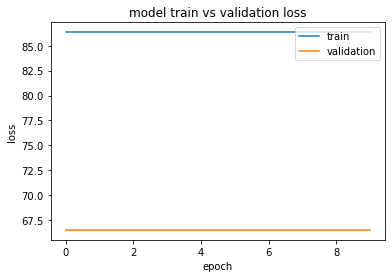

In [252]:
plt.plot(historyDAX.history['loss'])
plt.plot(historyDAX.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
